In [1]:
#train a large s-x randomly generated space.
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import h5py

In [2]:
def test_function(x1, x2, x3, mH2, s12, s14):
    mt2 = 1
    F1 = mt2 + 2*mt2*(x1 + x2 + x3) + mt2*(x1**2 + x2**2 + x3**2) + 2*mt2*(x2*x3 + x1*x3 + x1*x2) - mH2*(x1*x2 + x2*x3) - x2*s14 - x1*x3*s12
    F1 = 1/F1# return x1**2 + x2*x1

    return F1**2




#defining a new activation function
#2nd derivative of my sigmoid functon
def sigmoid_3rd_derivative(x):
    sigmoid_x = torch.sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)*(1-6*sigmoid_x + 6*sigmoid_x**2)


def sigmoid_2nd_derivative(x):
    sigmoid_x = torch.sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)*(1-2*sigmoid_x)

def sigmoid_derivative(x):
    sigmoid_x = torch.sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)



In [3]:

#x = torch.rand(3, 10)
#s = torch.tensor([[-8.0],[-26.0],[-13.0]])


#test_function(x[0],x[1],x[2],s[0],s[1],s[2])




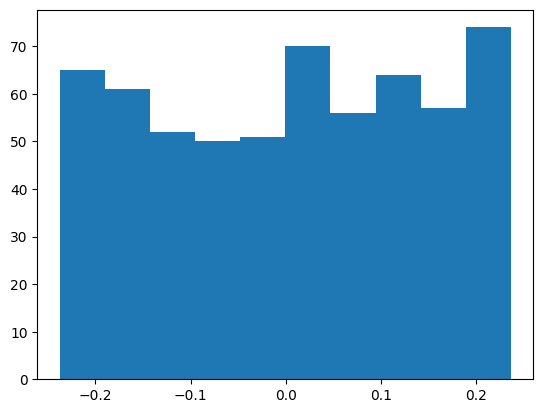

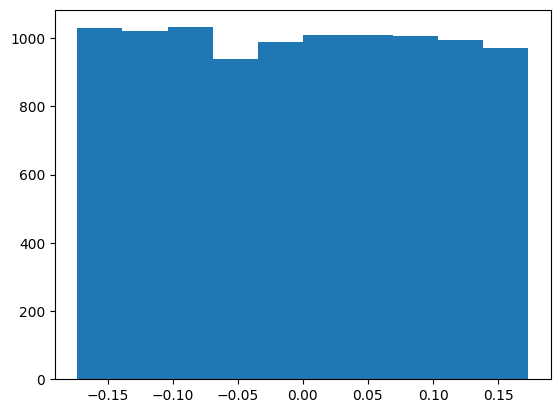

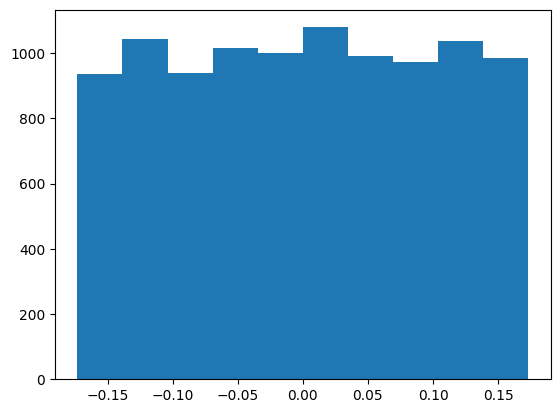

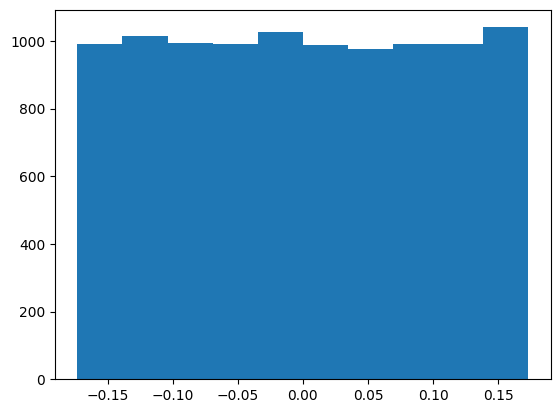

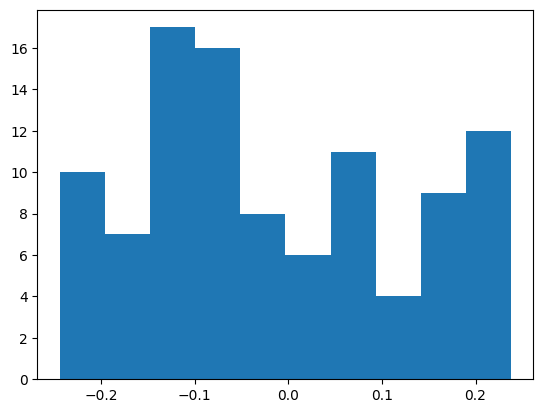

/tmp/ipykernel_4675/2171224893.py:542: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3614.)
  x = (x2.T[epoch%npts_cycle]).T.view(3, 1)


Epoch  [5/1000],   Loss: 0.56754684
Epoch  [10/1000],   Loss: 0.56753355
Epoch  [15/1000],   Loss: 0.56751263
Epoch  [20/1000],   Loss: 0.56747687
Epoch  [25/1000],   Loss: 0.56741285
Epoch  [30/1000],   Loss: 0.56729776
Epoch  [35/1000],   Loss: 0.56708831
Epoch  [40/1000],   Loss: 0.56671780
Epoch  [45/1000],   Loss: 0.56608754
Epoch  [50/1000],   Loss: 0.56504112
Epoch  [55/1000],   Loss: 0.56336051
Epoch  [60/1000],   Loss: 0.56076854
Epoch  [65/1000],   Loss: 0.55686170
Epoch  [70/1000],   Loss: 0.55112755
Epoch  [75/1000],   Loss: 0.54279345
Epoch  [80/1000],   Loss: 0.53103495
Epoch  [85/1000],   Loss: 0.51582539
Epoch  [90/1000],   Loss: 0.50327802
Epoch  [95/1000],   Loss: 0.49425000
Epoch  [100/1000],   Loss: 0.46019846
Epoch  [105/1000],   Loss: 0.42932299
Epoch  [110/1000],   Loss: 0.39541137
Epoch  [115/1000],   Loss: 0.36267087
Epoch  [120/1000],   Loss: 0.39019433
Epoch  [125/1000],   Loss: 0.40120646
Epoch  [130/1000],   Loss: 0.26113158
Epoch  [135/1000],   Loss: 0.294

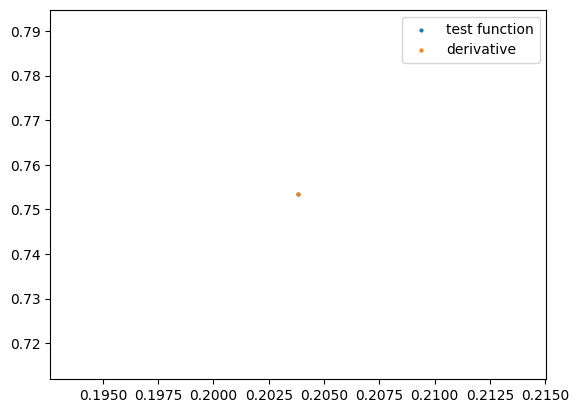

In [4]:
#training data


#getting the data
#npts = 1#1  #made small so more parameters can be shifted through
nf = 3 # number of features ie number of auxillary variables

def sigmoid_3rd_derivative(x):
    sigmoid_x = torch.sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)*(1-6*sigmoid_x + 6*sigmoid_x**2)


def sigmoid_2nd_derivative(x):
    sigmoid_x = torch.sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)*(1-2*sigmoid_x)

def sigmoid_derivative(x):
    sigmoid_x = torch.sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)


def test_function(x1, x2, x3, mH2, s12, s14):
    mt2 = 1
    F1 = mt2 + 2*mt2*(x1 + x2 + x3) + mt2*(x1**2 + x2**2 + x3**2) + 2*mt2*(x2*x3 + x1*x3 + x1*x2) - mH2*(x1*x2 + x2*x3) - x2*s14 - x1*x3*s12
    F1 = 1/F1# return x1**2 + x2*x1
    return F1**2

def new_test_function(t1, t2, t3, mH2, s12, s14):
    mt2 = 1
    x1 = (3-2*t1)*t1**2
    x2 = (3-2*t2)*t2**2
    x3 = (3-2*t3)*t3**2

    F1 = mt2 + 2*mt2*(x1 + x2 + x3) + mt2*(x1**2 + x2**2 + x3**2) + 2*mt2*(x2*x3 + x1*x3 + x1*x2) - mH2*(x1*x2 + x2*x3) - x2*s14 - x1*x3*s12
    F1 = 1/F1# return x1**2 + x2*x1

    w1 = 6*t1*(1-t1)
    w2 = 6*t2*(1-t2)
    w3 = 6*t3*(1-t3)

    return w1*w2*w3*F1**2

def normalised_test_function(x1, x2, x3, mH2, s12, s14):
    normalised_value = new_test_function(x1, x2, x3, mH2, s12, s14)/new_test_function(0.5, 0.5, 0.5, mH2, s12, s14)
    return x1*x2*x3*mH2*s12*s14#normalised_value
#will generate my x, y and s values in the iteration 
#x = torch.rand(nf, npts) 
#y = test_function(x[0], x[1], x[2])

#s = (torch.rand(3,1)* 27) -30
    #get both at once/ random
#x = torch.rand(nf, npts) 
#y = test_function(x[0], x[1], x[2], s[0], s[1], s[2])


input_size=6 #3 aux vairbales #3 params
hidden_size1=100#50#40
hidden_size2=100#50#40
hidden_size3=100#50#40
hidden_size4=100#50#100 #to cause btter uniformitity of the outlayer weights
#hidden_size5=50
output_size=1
#xavier initialisation
#revisit this
limit_in = np.sqrt(6.0/(input_size+hidden_size1))
limit = np.sqrt(6.0/(2*hidden_size1))
limit_out = np.sqrt(6.0/(hidden_size4 + output_size))

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
       

        self.weights_input_hidden1 = nn.Parameter(torch.from_numpy(np.random.uniform(low = -limit_in, high = limit_in, size = (input_size, hidden_size1))).to(torch.float32))
        self.bias_input_hidden1 = nn.Parameter(torch.zeros( hidden_size1))
        self.weights_hidden1_hidden2 = nn.Parameter(torch.from_numpy(np.random.uniform(low = -limit, high = limit, size = (hidden_size1, hidden_size2))).to(torch.float32))
        self.bias_hidden1_hidden2 = nn.Parameter(torch.zeros(hidden_size2))
        self.weights_hidden2_hidden3 = nn.Parameter(torch.from_numpy(np.random.uniform(low = -limit, high = limit, size = (hidden_size2, hidden_size3))).to(torch.float32))
        self.bias_hidden2_hidden3 = nn.Parameter(torch.zeros(hidden_size3))
        self.weights_hidden3_hidden4 = nn.Parameter(torch.from_numpy(np.random.uniform(low = -limit, high = limit, size = (hidden_size3, hidden_size4))).to(torch.float32))
        self.bias_hidden3_hidden4 = nn.Parameter(torch.zeros(hidden_size4))
        self.weights_hidden4_output = nn.Parameter(torch.from_numpy(np.random.uniform(low = -limit_out, high = limit_out, size = (hidden_size4, output_size))).to(torch.float32))
        self.bias_hidden4_output = nn.Parameter(torch.zeros(output_size))

        with torch.no_grad():
        #turn matrix into a vector and get a flat distitbution 1D
            plt.hist(self.weights_input_hidden1.view(-1))
            plt.show()
            plt.hist(self.weights_hidden1_hidden2.view(-1), bins = 10)
            plt.show()
            plt.hist(self.weights_hidden2_hidden3.view(-1), bins = 10)
            plt.show() 
            plt.hist(self.weights_hidden3_hidden4.view(-1), bins = 10)
            plt.show()
            plt.hist(self.weights_hidden4_output.view(-1), bins = 10)
            plt.show()

        
        #save model once training
        #hdf5 files save my model, 



    
        #defining my network
        #self.weights_input_hidden1 = nn.Parameter(torch.randn(input_size, hidden_size1))
        #self.bias_input_hidden1 = nn.Parameter(torch.zeros( hidden_size1))
        #self.weights_hidden1_hidden2 = nn.Parameter(torch.randn(hidden_size1, hidden_size2))
        #self.bias_hidden1_hidden2 = nn.Parameter(torch.zeros(hidden_size2))
        #self.weights_hidden2_hidden3 = nn.Parameter(torch.randn(hidden_size2, hidden_size3))
        #self.bias_hidden2_hidden3 = nn.Parameter(torch.zeros(hidden_size3))
        #self.weights_hidden3_hidden4 = nn.Parameter(torch.randn(hidden_size3, hidden_size4))
        #self.bias_hidden3_hidden4 = nn.Parameter(torch.zeros(hidden_size4))
        #self.weights_hidden4_output = nn.Parameter(torch.randn(hidden_size4, output_size))
        #self.bias_hidden4_output = nn.Parameter(torch.zeros(output_size))

    def derivative(self, x, s):
        
        #convert singlurar dimensional tensors to 2dimensional ones
        a1_0 = x[0] #torch.Size([500])
        a2_0 = x[1] #torch.Size([500])
        a3_0 = x[2]

        a4_0 = s[0]
        a5_0 = s[1]
        a6_0 = s[2]


        a1_0_reshaped = a1_0.view(npts, 1) #change back to npts 
        a2_0_reshaped = a2_0.view(npts, 1)
        a3_0_reshaped = a3_0.view(npts, 1)

        a4_0_reshaped = a4_0.view(s_npts, 1)
        a5_0_reshaped = a5_0.view(s_npts, 1)
        a6_0_reshaped = a6_0.view(s_npts, 1)
        #print(a1_0_reshaped.shape) torch.Size([500, 1])

        wi1_1 = self.weights_input_hidden1[0].view(1, hidden_size1)
        wi2_1 = self.weights_input_hidden1[1].view(1, hidden_size1)
        wi3_1 = self.weights_input_hidden1[2].view(1, hidden_size1)

        wi4_1 = self.weights_input_hidden1[3].view(1, hidden_size1)
        wi5_1 = self.weights_input_hidden1[4].view(1, hidden_size1)
        wi6_1 = self.weights_input_hidden1[5].view(1, hidden_size1)
        #print(self.weights_input_hidden1.shape)
        

        bi_1 = self.bias_input_hidden1

        zi_1 = torch.matmul(a1_0_reshaped, wi1_1) + torch.matmul(a2_0_reshaped, wi2_1) + torch.matmul(a3_0_reshaped, wi3_1) + torch.matmul(a4_0_reshaped, wi4_1)+ torch.matmul(a5_0_reshaped, wi5_1) + torch.matmul(a6_0_reshaped, wi6_1) + bi_1
       # print(zi_1.shape)#torch.Size([500, 15])
        #assert zi_1.shape == (input_size,hidden_size1)

        #derivates of my ai_1

        dai_1_dx1 = sigmoid_derivative(zi_1)*wi1_1 #torch.Size([500, 15])
        dai_1_dx2 = sigmoid_derivative(zi_1)*wi2_1 #torch.Size([500, 15])
        dai_1_dx3 = sigmoid_derivative(zi_1)*wi3_1 #torch.Size([500, 15])

        d2a_1_dx1dx2 = sigmoid_2nd_derivative(zi_1)*wi1_1*wi2_1
       #print(d2a_1_dx1dx2.shape) torch.Size([500, 15])
        d2a_1_dx2dx3 = sigmoid_2nd_derivative(zi_1)*wi2_1*wi3_1
        d2a_1_dx1dx3 = sigmoid_2nd_derivative(zi_1)*wi1_1*wi3_1
        
        
        d3a_1_dx1dx2dx3 = sigmoid_3rd_derivative(zi_1)*wi1_1*wi2_1*wi3_1
        #print(d3a_1_dx1dx2dx3.shape) torch.Size([500, 15])

        ai_1 = torch.sigmoid(zi_1)
        #print(ai_1.shape)
    
    #have rto go over a deribvaives on my current pageochsoch
    #cjsipjcpsajvcnvijvjvjfvjvjfvijfivjifvjifjvifjv


    #got here

    

        zi_2 = torch.zeros(npts, hidden_size2)

        #creating empyt array for my derivatives of zi_2
        sum1 = torch.zeros(npts, hidden_size2) # = dzi_2_dx1
        sum2 = torch.zeros(npts, hidden_size2)
        sum3 = torch.zeros(npts, hidden_size2)
        sum23 = torch.zeros(npts, hidden_size2)
        sum13 = torch.zeros(npts, hidden_size2)
        sum12 = torch.zeros(npts, hidden_size2) # =d2zi_2_dx1dx2
        sum123 = torch.zeros(npts, hidden_size2)

        #sum12 = torch.zeros(500,20) # is this right
        
        #print(zi_1)
        for j in range(0, hidden_size1):
            #collect the relevent columns and rows for the operations in the sum
            aj_1 = ai_1.T[j]#jth component of ai_1 effectively the same thing :)
            wij_2 = self.weights_hidden1_hidden2[j]
            daj_1_dx1 = dai_1_dx1.T[j] #jth component of ai_1 effectively the same thing :)
            daj_1_dx2 = dai_1_dx2.T[j] #jth component of ai_1 effectively the same thing :)
            daj_1_dx3 = dai_1_dx3.T[j]
            d2aj_1_dx1dx2 = d2a_1_dx1dx2.T[j] # jth compnetns 
            d2aj_1_dx2dx3 = d2a_1_dx2dx3.T[j] # jth compnetns 
            d2aj_1_dx1dx3 = d2a_1_dx1dx3.T[j] # jth compnetns 
            d3aj_1_dx1dx2dx3 =  d3a_1_dx1dx2dx3.T[j] # jth componets


            #reformat them
            aj_1_reshaped = aj_1.view(npts, 1)
            daj_1_dx1_reshaped = daj_1_dx1.view(npts, 1)
            daj_1_dx2_reshaped = daj_1_dx2.view(npts, 1)
            daj_1_dx3_reshaped = daj_1_dx3.view(npts, 1)
            d2aj_1_dx1dx2_reshaped = d2aj_1_dx1dx2.view(npts, 1)
            d2aj_1_dx2dx3_reshaped = d2aj_1_dx2dx3.view(npts, 1)
            d2aj_1_dx1dx3_reshaped = d2aj_1_dx1dx3.view(npts, 1)
            d3aj_1_dx1dx2dx3_reshaped =  d3aj_1_dx1dx2dx3.view(npts, 1)


            wij_2_reshaped = wij_2.view(1, hidden_size2) #should this be hidden_size1


            #summing my sums to calculate the d3a_2_dx1dx2dx3
            zi_2 = zi_2 + torch.matmul(aj_1_reshaped, wij_2_reshaped)
            sum1 = sum1 + torch.matmul(daj_1_dx1_reshaped, wij_2_reshaped)
            sum2 = sum2 + torch.matmul(daj_1_dx2_reshaped, wij_2_reshaped)
            sum3 = sum3 + torch.matmul(daj_1_dx3_reshaped, wij_2_reshaped)
            sum12 = sum12 + torch.matmul(d2aj_1_dx1dx2_reshaped, wij_2_reshaped)
            sum23 = sum23 + torch.matmul(d2aj_1_dx2dx3_reshaped, wij_2_reshaped)
            sum13 = sum13 + torch.matmul(d2aj_1_dx1dx3_reshaped, wij_2_reshaped)
            sum123 = sum123 + torch.matmul(d3aj_1_dx1dx2dx3_reshaped, wij_2_reshaped)


            #print(zi_1.shape) torch.Size([500, 20])
        bi_2 = self.bias_hidden1_hidden2
        zi_2 = zi_2 + bi_2
        ai_2 = torch.sigmoid(zi_2)
        #print(ai_2.shape)
        d3a_2_dx1dx2dx3 = sigmoid_3rd_derivative(zi_2)*sum1*sum2*sum3 + sigmoid_2nd_derivative(zi_2)*(sum1*sum23 + sum2*sum13 + sum3*sum12) + sigmoid_derivative(zi_2)*sum123
        da_2_dx1 = sigmoid_derivative(zi_2)*sum1
        da_2_dx2 = sigmoid_derivative(zi_2)*sum2
        da_2_dx3 = sigmoid_derivative(zi_2)*sum3
        d2a_2_dx1dx2 = sigmoid_2nd_derivative(zi_2)*sum1*sum2 + sigmoid_derivative(zi_2)*sum12
        d2a_2_dx1dx3 = sigmoid_2nd_derivative(zi_2)*sum1*sum3 + sigmoid_derivative(zi_2)*sum13
        d2a_2_dx2dx3 = sigmoid_2nd_derivative(zi_2)*sum2*sum3 + sigmoid_derivative(zi_2)*sum23
        
        #print(d2a_2_dx1dx2.shape) #torch.Size([500, 20])


        #hidden layer 3
        zi_3 = torch.zeros(npts, hidden_size3)
        #creating empyt array for my derivatives of zi_2
        dzi_3_dx1 = torch.zeros(npts, hidden_size3)
        dzi_3_dx2 = torch.zeros(npts, hidden_size3)
        dzi_3_dx3 = torch.zeros(npts, hidden_size3)
        d2zi_3_dx1dx2 = torch.zeros(npts, hidden_size3)
        d2zi_3_dx1dx3 = torch.zeros(npts, hidden_size3)
        d2zi_3_dx2dx3 = torch.zeros(npts, hidden_size3)
        d3zi_3_dx1dx2dx3 = torch.zeros(npts, hidden_size3)

        for k in range(0, hidden_size2):
            #collect the relevent columns and rows for the operations in the sum
            aj_2 = ai_2.T[k]#jth component of ai_1 effectively the same thing :)
            wij_3 = self.weights_hidden2_hidden3[k]



            daj_2_dx1 = da_2_dx1.T[k] #jth component of ai_1 effectively the same thing :)
            daj_2_dx2 = da_2_dx2.T[k] #jth component of ai_1 effectively the same thing :)
            daj_2_dx3 = da_2_dx3.T[k]
            d2aj_2_dx1dx2 = d2a_2_dx1dx2.T[k] # jth compnetns 
            d2aj_2_dx2dx3 = d2a_2_dx2dx3.T[k] # jth compnetns 
            d2aj_2_dx1dx3 = d2a_2_dx1dx3.T[k] # jth compnetns 
            d3aj_2_dx1dx2dx3 =  d3a_2_dx1dx2dx3.T[k] # jth componets


            #reformat them
            aj_2_reshaped = aj_2.view(npts, 1)
            daj_2_dx1_reshaped = daj_2_dx1.view(npts, 1)
            daj_2_dx2_reshaped = daj_2_dx2.view(npts, 1)
            daj_2_dx3_reshaped = daj_2_dx3.view(npts, 1)
            d2aj_2_dx1dx2_reshaped = d2aj_2_dx1dx2.view(npts, 1)
            d2aj_2_dx2dx3_reshaped = d2aj_2_dx2dx3.view(npts, 1)
            d2aj_2_dx1dx3_reshaped = d2aj_2_dx1dx3.view(npts, 1)
            d3aj_2_dx1dx2dx3_reshaped =  d3aj_2_dx1dx2dx3.view(npts, 1)


            wij_3_reshaped = wij_3.view(1, hidden_size3) #should this be hidden_size1


            #summing my sums to calculate the d3a_2_dx1dx2dx3
            zi_3 = zi_3 + torch.matmul(aj_2_reshaped, wij_3_reshaped)
            dzi_3_dx1 = dzi_3_dx1 + torch.matmul(daj_2_dx1_reshaped, wij_3_reshaped)
            dzi_3_dx2 = dzi_3_dx2 + torch.matmul(daj_2_dx2_reshaped, wij_3_reshaped)
            dzi_3_dx3 = dzi_3_dx3 + torch.matmul(daj_2_dx3_reshaped, wij_3_reshaped)
            d2zi_3_dx1dx2 = d2zi_3_dx1dx2 + torch.matmul(d2aj_2_dx1dx2_reshaped, wij_3_reshaped)
            d2zi_3_dx1dx3 = d2zi_3_dx1dx3 + torch.matmul(d2aj_2_dx1dx3_reshaped, wij_3_reshaped)
            d2zi_3_dx2dx3 = d2zi_3_dx2dx3 + torch.matmul(d2aj_2_dx2dx3_reshaped, wij_3_reshaped)
            d3zi_3_dx1dx2dx3 = d3zi_3_dx1dx2dx3 + torch.matmul(d3aj_2_dx1dx2dx3_reshaped, wij_3_reshaped)

        bi_3 = self.bias_hidden2_hidden3
        zi_3 = zi_3 + bi_3
        ai_3 = torch.sigmoid(zi_3)
        #print(ai_3.shape)

        d3a_3_dx1dx2dx3 = sigmoid_3rd_derivative(zi_3)*dzi_3_dx1*dzi_3_dx2*dzi_3_dx3 + sigmoid_2nd_derivative(zi_3)*(dzi_3_dx1*d2zi_3_dx2dx3 +  dzi_3_dx2*d2zi_3_dx1dx3 +  dzi_3_dx3*d2zi_3_dx1dx2) + sigmoid_derivative(zi_3)*d3zi_3_dx1dx2dx3
        da_3_dx1 = sigmoid_derivative(zi_3)*dzi_3_dx1
        da_3_dx2 = sigmoid_derivative(zi_3)*dzi_3_dx2
        da_3_dx3 = sigmoid_derivative(zi_3)*dzi_3_dx2
        d2a_3_dx1dx2 = sigmoid_2nd_derivative(zi_3)*dzi_3_dx1*dzi_3_dx2 + sigmoid_derivative(zi_3)*d2zi_3_dx1dx2
        d2a_3_dx1dx3 = sigmoid_2nd_derivative(zi_3)*dzi_3_dx1*dzi_3_dx3 + sigmoid_derivative(zi_3)*d2zi_3_dx1dx3
        d2a_3_dx2dx3 = sigmoid_2nd_derivative(zi_3)*dzi_3_dx2*dzi_3_dx3 + sigmoid_derivative(zi_3)*d2zi_3_dx2dx3

        zi_4 = torch.zeros(npts, hidden_size4)
        #creating empyt array for my derivatives of zi_2
        dzi_4_dx1 = torch.zeros(npts, hidden_size4)
        dzi_4_dx2 = torch.zeros(npts, hidden_size4)
        dzi_4_dx3 = torch.zeros(npts, hidden_size4)
        d2zi_4_dx1dx2 = torch.zeros(npts, hidden_size4)
        d2zi_4_dx1dx3 = torch.zeros(npts, hidden_size4)
        d2zi_4_dx2dx3 = torch.zeros(npts, hidden_size4)
        d3zi_4_dx1dx2dx3 = torch.zeros(npts, hidden_size4)


        for m in range(0, hidden_size3):
            #collect the relevent columns and rows for the operations in the sum
            aj_3 = ai_3.T[m]#jth component of ai_1 effectively the same thing :)
            wij_4 = self.weights_hidden3_hidden4[m]



            daj_3_dx1 = da_3_dx1.T[m] #jth component of ai_1 effectively the same thing :)
            daj_3_dx2 = da_3_dx2.T[m] #jth component of ai_1 effectively the same thing :)
            daj_3_dx3 = da_3_dx3.T[m]
            d2aj_3_dx1dx2 = d2a_3_dx1dx2.T[m] # jth compnetns 
            d2aj_3_dx2dx3 = d2a_3_dx2dx3.T[m] # jth compnetns 
            d2aj_3_dx1dx3 = d2a_3_dx1dx3.T[m] # jth compnetns 
            d3aj_3_dx1dx2dx3 =  d3a_3_dx1dx2dx3.T[m] # jth componets


            #reformat them
            aj_3_reshaped = aj_3.view(npts, 1)
            daj_3_dx1_reshaped = daj_3_dx1.view(npts, 1)
            daj_3_dx2_reshaped = daj_3_dx2.view(npts, 1)
            daj_3_dx3_reshaped = daj_3_dx3.view(npts, 1)
            d2aj_3_dx1dx2_reshaped = d2aj_3_dx1dx2.view(npts, 1)
            d2aj_3_dx2dx3_reshaped = d2aj_3_dx2dx3.view(npts, 1)
            d2aj_3_dx1dx3_reshaped = d2aj_3_dx1dx3.view(npts, 1)
            d3aj_3_dx1dx2dx3_reshaped =  d3aj_3_dx1dx2dx3.view(npts, 1)


            wij_4_reshaped = wij_4.view(1, hidden_size4) #should this be hidden_size1


            #summing my sums to calculate the d3a_2_dx1dx2dx3
            zi_4 = zi_4 + torch.matmul(aj_3_reshaped, wij_4_reshaped)

            dzi_4_dx1 = dzi_4_dx1 + torch.matmul(daj_3_dx1_reshaped, wij_4_reshaped)
            dzi_4_dx2 = dzi_4_dx2 + torch.matmul(daj_3_dx2_reshaped, wij_4_reshaped)
            dzi_4_dx3 = dzi_4_dx3 + torch.matmul(daj_3_dx3_reshaped, wij_4_reshaped)
            d2zi_4_dx1dx2 = d2zi_4_dx1dx2 + torch.matmul(d2aj_3_dx1dx2_reshaped, wij_4_reshaped)
            d2zi_4_dx1dx3 = d2zi_4_dx1dx3 + torch.matmul(d2aj_3_dx1dx3_reshaped, wij_4_reshaped)
            d2zi_4_dx2dx3 = d2zi_4_dx2dx3 + torch.matmul(d2aj_3_dx2dx3_reshaped, wij_4_reshaped)
            d3zi_4_dx1dx2dx3 = d3zi_4_dx1dx2dx3 + torch.matmul(d3aj_3_dx1dx2dx3_reshaped, wij_4_reshaped)

        bi_4 = self.bias_hidden3_hidden4
        zi_4 = zi_4 + bi_4
        ai_4 = torch.sigmoid(zi_4)
        da_4_dx1 = sigmoid_derivative(zi_4)*dzi_4_dx1
        da_4_dx2 = sigmoid_derivative(zi_4)*dzi_4_dx2
        da_4_dx3 = sigmoid_derivative(zi_4)*dzi_4_dx2
        d2a_4_dx1dx2 = sigmoid_2nd_derivative(zi_4)*dzi_4_dx1*dzi_4_dx2 + sigmoid_derivative(zi_4)*d2zi_4_dx1dx2
        d2a_4_dx1dx3 = sigmoid_2nd_derivative(zi_4)*dzi_4_dx1*dzi_4_dx3 + sigmoid_derivative(zi_4)*d2zi_4_dx1dx3
        d2a_4_dx2dx3 = sigmoid_2nd_derivative(zi_4)*dzi_4_dx2*dzi_4_dx3 + sigmoid_derivative(zi_4)*d2zi_4_dx2dx3


        d3a_4_dx1dx2dx3 = sigmoid_3rd_derivative(zi_4)*dzi_4_dx1*dzi_4_dx2*dzi_4_dx3 + sigmoid_2nd_derivative(zi_4)*(dzi_4_dx1*d2zi_4_dx2dx3 +  dzi_4_dx2*d2zi_4_dx1dx3 +  dzi_4_dx3*d2zi_4_dx1dx2) + sigmoid_derivative(zi_4)*d3zi_4_dx1dx2dx3





       #now have to calculate the output
        wj_5 = self.weights_hidden4_output


        d3y_dx1dx2dx3 = torch.mm(d3a_4_dx1dx2dx3, wj_5)
        ai_j = [ ai_1, ai_2, ai_3, ai_4]
        dai_j_dx1 = [dai_1_dx1, da_2_dx1, da_3_dx1 , da_4_dx1]
        dai_j_dx2 = [dai_1_dx2, da_2_dx2, da_3_dx2 , da_4_dx2]
        dai_j_dx3 = [dai_1_dx2, da_2_dx3, da_3_dx3 , da_4_dx3]
        dai_j_dxm = [dai_j_dx1, dai_j_dx2, dai_j_dx3]
      

        
        
        #print([d3y_dx1dx2dx3, ai_j].shape)

        return [d3y_dx1dx2dx3, ai_j, dai_j_dxm]#,dai_j_dx2, dai_j_dx3 ]# ai_1, ai_2, ai_3, ai_4] #ai_j
    
    
    def forward(self, x, s): #plotting
        #convert singlurar dimensional tensors to 2dimensional ones
        a1_0 = x[0] #torch.Size([500])
        a2_0 = x[1] #torch.Size([500])
        a3_0 = x[2] #torch.Size([500])

        a4_0 = s[0]
        a5_0 = s[1]
        a6_0 = s[2]

        a1_0_reshaped = a1_0.view(len(a1_0), 1)
        a2_0_reshaped = a2_0.view(len(a2_0), 1)
        a3_0_reshaped = a3_0.view(len(a3_0), 1)
        a4_0_reshaped = a4_0.view(len(a4_0), 1)
        a5_0_reshaped = a5_0.view(len(a5_0), 1)
        a6_0_reshaped = a6_0.view(len(a6_0), 1)
        #print(a1_0_reshaped.shape) torch.Size([500, 1])

        wi1_1 = self.weights_input_hidden1[0].view(1, hidden_size1)
        wi2_1 = self.weights_input_hidden1[1].view(1, hidden_size1)
        wi3_1 = self.weights_input_hidden1[2].view(1, hidden_size1)
        wi4_1 = self.weights_input_hidden1[3].view(1, hidden_size1)
        wi5_1 = self.weights_input_hidden1[4].view(1, hidden_size1)
        wi6_1 = self.weights_input_hidden1[5].view(1, hidden_size1)
        bi_1 = self.bias_input_hidden1

        zi_1 = torch.matmul(a1_0_reshaped, wi1_1) + torch.matmul(a2_0_reshaped, wi2_1) + torch.matmul(a3_0_reshaped, wi3_1) + torch.matmul(a4_0_reshaped, wi4_1) + torch.matmul(a5_0_reshaped, wi5_1) + torch.matmul(a6_0_reshaped, wi6_1) + bi_1
        ai_1 = torch.sigmoid(zi_1)

        wj_2 = self.weights_hidden1_hidden2
        bi_2 = self.bias_hidden1_hidden2
        zi_2 = torch.mm(ai_1, wj_2) +bi_2#y in notes 
        ai_2 = torch.sigmoid(zi_2)


        wj_3 = self.weights_hidden2_hidden3
        bi_3 = self.bias_hidden2_hidden3

        zi_3 = torch.mm(ai_2, wj_3) +bi_3#y in notes 
        ai_3 = torch.sigmoid(zi_3)

        wj_4 = self.weights_hidden3_hidden4
        bi_4 = self.bias_hidden3_hidden4

        zi_4 = torch.mm(ai_3, wj_4) +bi_4#y in notes 
        ai_4 = torch.sigmoid(zi_4)



        #print(ai_2.shape) torch.Size([500, 20])
        wj_5 = self.weights_hidden4_output

        output_layer = torch.mm(ai_4, wj_5)       #effecticely y

        #print(output_layer.shape)
        
        return output_layer
    

    

poly_model = NeuralNetwork()
    #define the loss function using the mean squared error
loss_function = nn.MSELoss()

#using the Stochastic gradient descent optimiser this time
optimizer = optim.Adam(poly_model.parameters(), lr = 0.001)#better0.0001 than 0.000001 for 400000)#0.0005)
#changed Adam lr from 0.0001 to 0.000001

#learning rate too small, very flat not moving
#loss jumping too large

#forward pass and backward pass to train the network
iterations = 1000#320000#1000000   #120000#3hours
n_repeats = 5
npts = 1
npts_cycle = 5#int(iterations/4*n_repeats)
collection_rate = int(npts_cycle)
s_npts = 1
#list are inefficient use np.array are better, need to know size at the beginning, initilising array at right dim and size, very quick
#appending is slow, 

loss_array = []
iteration_array = []
s_array = []
x_array = []
ai_1_mean_array = []
dai_1_mean_dx1_array = []
dai_1_mean_dx2_array = []
dai_1_mean_dx3_array = []

ai_2_mean_array = []
dai_2_mean_dx1_array = []
dai_2_mean_dx2_array = []
dai_2_mean_dx3_array = []

ai_3_mean_array = []
dai_3_mean_dx1_array = []
dai_3_mean_dx2_array = []
dai_3_mean_dx3_array = []

ai_4_mean_array = []
dai_4_mean_dx1_array = []
dai_4_mean_dx2_array = []
dai_4_mean_dx3_array = []

ai_1_std_array = []
dai_1_std_dx1_array = []
dai_1_std_dx2_array = []
dai_1_std_dx3_array = []


ai_2_std_array = []
dai_2_std_dx1_array = []
dai_2_std_dx2_array = []
dai_2_std_dx3_array = []

ai_3_std_array = []
dai_3_std_dx1_array = []
dai_3_std_dx2_array = []
dai_3_std_dx3_array = []

ai_4_std_array = []
dai_4_std_dx1_array = []
dai_4_std_dx2_array = []
dai_4_std_dx3_array = []

iteration_array_for_sigmoid = []
#s = (torch.rand(3,npts)* 27) -30  #move it back in

#-19.76241379	-27.11931034	-10.41482759	1	0.00430531	1.7702E-15
#s = torch.tensor([[-19.76241379],	[-27.11931034],	[-10.41482759]])



#-3.01	-15.06965517	-15.95344828	1	0.00785647	1.41014E-15s = torch.tensor([[-3.01], [-15.06965517],[-15.95344828]])

#s = (torch.rand(3,npts)* 27) -30
#x_npts = 100 #3*100 points, why not do the same for the s values
#x = torch.rand(nf, npts)
x2 = torch.rand(3, npts_cycle)
s2 = (torch.rand(3,npts_cycle)* 27) -30


for epoch in range(iterations):
    
    x = (x2.T[epoch%npts_cycle]).T.view(3, 1)
    s = (s2.T[epoch%npts_cycle]).T.view(3, 1)
    #print(s)
    #print(x)
   # print(x)
    #if (epoch + 1) % npts == 0: #10000
        #x = torch.rand(3, npts)
    #print(x)
       # s = (torch.rand(3,npts)* 27) -30
        
     #   x = torch.rand(nf, npts)
        
    y = normalised_test_function(x[0], x[1], x[2], s[0], s[1], s[2])

    optimizer.zero_grad()   
    outputs = poly_model.derivative(x,s)#.view(-1,1) #reshape x to match input dimension #forward pass
    loss = loss_function(outputs[0], y.view(-1,1))  #derivative
        
        
   # print(outputs[1])
    loss.backward() #backward pass
    optimizer.step() #update parameters
    
    #print(poly_model.ai_1)

    #print(poly_model.weights_input_hidden1.grad)
    
    #getting data 
    if (epoch + 1) % collection_rate == 0: #10000
        print(f'Epoch  [{epoch+1}/{iterations}],   Loss: {loss.item():.8f}')

        loss_array.append(loss)
        iteration_array.append(epoch+1)
      
        with torch.no_grad():
            #print(f'Epoch  [{epoch+1}/{iterations}]')
            ai_j_array = outputs[1]
           # print(ai_j_array)
            dai_j_dxm_array = outputs[2]

 #           ai_1_mean_array.append(torch.sum(ai_j_array[0][0])/len(ai_j_array[0][0]))
  #          ai_2_mean_array.append(torch.sum(ai_j_array[1][0])/len(ai_j_array[1][0]))
   #         ai_3_mean_array.append(torch.sum(ai_j_array[2][0])/len(ai_j_array[2][0]))
    #        ai_4_mean_array.append(torch.sum(ai_j_array[3][0])/len(ai_j_array[3][0]))
           

     #       ai_1_std_array.append(torch.std(ai_j_array[0][0]).item())
      #      ai_2_std_array.append(torch.std(ai_j_array[1][0]).item())
       #     ai_3_std_array.append(torch.std(ai_j_array[2][0]).item())
        #    ai_4_std_array.append(torch.std(ai_j_array[3][0]).item())
            
         #   dai_1_mean_dx1_array.append(torch.sum(dai_j_dxm_array[0][0][0])/len(dai_j_dxm_array[0][0][0]))
          #  dai_2_mean_dx1_array.append(torch.sum(dai_j_dxm_array[0][1][0])/len(dai_j_dxm_array[0][1][0]))
           # dai_3_mean_dx1_array.append(torch.sum(dai_j_dxm_array[0][2][0])/len(dai_j_dxm_array[0][2][0]))
            #dai_4_mean_dx1_array.append(torch.sum(dai_j_dxm_array[0][3][0])/len(dai_j_dxm_array[0][3][0]))

 #           dai_1_mean_dx2_array.append(torch.sum(dai_j_dxm_array[1][0][0])/len(dai_j_dxm_array[1][0][0]))
  #          dai_2_mean_dx2_array.append(torch.sum(dai_j_dxm_array[1][1][0])/len(dai_j_dxm_array[1][1][0]))
   #         dai_3_mean_dx2_array.append(torch.sum(dai_j_dxm_array[1][2][0])/len(dai_j_dxm_array[1][2][0]))
    #        dai_4_mean_dx2_array.append(torch.sum(dai_j_dxm_array[1][3][0])/len(dai_j_dxm_array[1][3][0]))

     #       dai_1_mean_dx3_array.append(torch.sum(dai_j_dxm_array[2][0][0])/len(dai_j_dxm_array[2][0][0]))
      #      dai_2_mean_dx3_array.append(torch.sum(dai_j_dxm_array[2][1][0])/len(dai_j_dxm_array[2][1][0]))
       #     dai_3_mean_dx3_array.append(torch.sum(dai_j_dxm_array[2][2][0])/len(dai_j_dxm_array[2][2][0]))
        #    dai_4_mean_dx3_array.append(torch.sum(dai_j_dxm_array[2][3][0])/len(dai_j_dxm_array[2][3][0]))

            #if this array had the right size already it would be faster 
            #append can be replaced. 

            dai_1_std_dx1_array.append(torch.std(dai_j_dxm_array[0][0][0]).item())
            dai_2_std_dx1_array.append(torch.std(dai_j_dxm_array[0][1][0]).item())
            dai_3_std_dx1_array.append(torch.std(dai_j_dxm_array[0][2][0]).item())
            dai_4_std_dx1_array.append(torch.std(dai_j_dxm_array[0][3][0]).item())

   #         dai_1_std_dx2_array.append(torch.std(dai_j_dxm_array[1][0][0]).item())
    #        dai_2_std_dx2_array.append(torch.std(dai_j_dxm_array[1][1][0]).item())
     #       dai_3_std_dx2_array.append(torch.std(dai_j_dxm_array[1][2][0]).item())
      #      dai_4_std_dx2_array.append(torch.std(dai_j_dxm_array[1][3][0]).item())

       #     dai_1_std_dx3_array.append(torch.std(dai_j_dxm_array[2][0][0]).item())
        #    dai_2_std_dx3_array.append(torch.std(dai_j_dxm_array[2][1][0]).item())
         #   dai_3_std_dx3_array.append(torch.std(dai_j_dxm_array[2][2][0]).item())
          #  dai_4_std_dx3_array.append(torch.std(dai_j_dxm_array[2][3][0]).item())

            iteration_array_for_sigmoid.append(epoch+1)


#plotting the data
poly_model.eval() #changes the data to a convientv form. parses the expression argument and evaluates it as a python expression. 
with torch.no_grad():
    #y_pred = poly_model.forward(x).detach().numpy()
    y_pred1 = poly_model.derivative(x,s)[0]#.detach().numpy()
    ##print(y_pred1)
    #print(x)
   # y_pred1_reformat = []
    #for i in range(len(y_pred1)):
     #   y_pred1_reformat.append(y_pred1[i])
    #print(y_pred1)
    plt.scatter(x[0], y, label =  "test function", s= 4)
    plt.scatter(x[0], y_pred1, label = "derivative", s = 4)
    #plt.scatter(x[0], y_pred, label = "forward", s = 1)
    plt.legend()     
    plt.show()


    #sample data

    #hpw tp use these spercific s parameters
    s_sample = torch.tensor([[-10.0], [-10.0], [-10.0]])


    y = normalised_test_function(x[0], x[1], x[2], s[0], s[1], s[2])

    #one_one_one = torch.tensor([[1.0], [1.0], [1.0]])
    #zero_one_one = torch.tensor([[0.0], [1.0], [1.0]])
    #one_zero_one = torch.tensor([[1.0], [0.0], [1.0]])
    #zero_zero_one = torch.tensor([[0.0], [0.0], [1.0]])
    #one_one_zero = torch.tensor([[1.0], [1.0], [0.0]])
    #zero_one_zero = torch.tensor([[0.0],[1.0], [0.0]])

    #one_zero_zero = torch.tensor([[1.0],[0.0], [0.0]])
    #zero_zero_zero = torch.tensor([[0.0], [0.0], [0.0]])
    #centre = torch.tensor([[0.5], [0.5], [0.5]])

    #N111 = poly_model.forward(one_one_one)
    #N011 = poly_model.forward(zero_one_one)
    #N101 = poly_model.forward(one_zero_one)
   # N001 = poly_model.forward(zero_zero_one)

    #N110 = poly_model.forward(one_one_zero)
    #N010 = poly_model.forward(zero_one_zero)
    #N100 = poly_model.forward(one_zero_zero)
    #N000 = poly_model.forward(zero_zero_zero)
    #Ncentre = poly_model.forward(centre)

    #print(N111 - N011 - N101 + N001 - N110 + N010 + N100 -N000)#/Ncentre


    


In [5]:
# = torch.tensor([[-10.0], [-10.0], [-10.0]])
 #   x_sample = torch.rand(nf, npts) 
  #  y = test_function(x[0], x[1], x[2], s[0], s[1], s[2])

#-19.76241379	-27.11931034	-10.41482759	1	0.00430531	1.7702E-15
#s = torch.tensor([[-19.76241379],	[-27.11931034],	[-10.41482759]])
#-3.01	-15.06965517	-15.95344828	1	0.00785647	1.41014E-15
s = torch.tensor([[-3.01], [-15.06965517],[-15.95344828]])


one_one_one = torch.tensor([[1.0], [1.0], [1.0]])
zero_one_one = torch.tensor([[0.0], [1.0], [1.0]])
one_zero_one = torch.tensor([[1.0], [0.0], [1.0]])#
zero_zero_one = torch.tensor([[0.0], [0.0], [1.0]])
one_one_zero = torch.tensor([[1.0], [1.0], [0.0]])
zero_one_zero = torch.tensor([[0.0],[1.0], [0.0]])
one_zero_zero = torch.tensor([[1.0],[0.0], [0.0]])
zero_zero_zero = torch.tensor([[0.0], [0.0], [0.0]])


N111 = poly_model.forward(one_one_one, s)
N011 = poly_model.forward(zero_one_one,s)
N101 = poly_model.forward(one_zero_one,s)
N001 = poly_model.forward(zero_zero_one, s)

N110 = poly_model.forward(one_one_zero, s)
N010 = poly_model.forward(zero_one_zero, s)
N100 = poly_model.forward(one_zero_zero, s)
N000 = poly_model.forward(zero_zero_zero, s)

NCentre  = new_test_function(0.5, 0.5, 0.5, s[0], s[1], s[2])
#Ncentre = poly_model.forward(centre)

I1 = (N111 - N011 - N101 + N001 - N110 + N010 + N100 -N000)*NCentre
#print(NCentre)
#tensor([0.0043]) #interesting
print(I1)





#iterations = 1000
#n_repeats = 10
#lr = 0.0001
#tensor([[62.2870]
#[[5.2231]]
#tensor([[160.6201]]
    
#iterations = 1000
#n_repeats = 10
#lr = 0.001
#tensor([[1.1128]]
#tensor([[5.9984]]



#iterations = 8000
#n_repeats = 5
#lr = 0.0001
#npts = 1 
#tensor([[0.0050]

#iterations = 8000
#n_repeats = 5
#lr = 0.00001
#npts = 1 
#tensor([[0.0050]

tensor([[0.0005]], grad_fn=<MulBackward0>)


In [6]:
ai_1_mean_array

[]

In [7]:
#0.0666
#normalise exported values
one_one_one = torch.tensor([[1.0], [1.0], [1.0]])
zero_one_one = torch.tensor([[0.0], [1.0], [1.0]])
one_zero_one = torch.tensor([[1.0], [0.0], [1.0]])#
zero_zero_one = torch.tensor([[0.0], [0.0], [1.0]])
one_one_zero = torch.tensor([[1.0], [1.0], [0.0]])
zero_one_zero = torch.tensor([[0.0],[1.0], [0.0]])
one_zero_zero = torch.tensor([[1.0],[0.0], [0.0]])
zero_zero_zero = torch.tensor([[0.0], [0.0], [0.0]])
centre = torch.tensor([[0.5], [0.5], [0.5]])

file_name_I1 = 'I1_integral_values_excel.xlsx'
#file_name_I1 = "C://Users//ruben//OneDrive//Desktop//year4project//I1_integral_values_excel.xlsx"
I1_data = pd.read_excel(file_name_I1)
#print(I1_data)
#print(I1_data['Column5'])
I1_values = I1_data['Column5']
I1_variance = I1_data['Column6']
mH2_values = I1_data['Column1']
s12_values = I1_data['Column2']
s14_values = I1_data['Column3']
#print(I1_values[26999])

#def our centre of the hypercube function for the integral

def centre_hypercube_integral(mH2,s12,s14):
    centre_integral = test_function(0.5, 0.5, 0.5, mH2, s12, s14)
    return centre_integral

p_array = []
i_array = []
ratio_array = []
for i in range(1,27000):
    s = torch.tensor([[mH2_values[i]],[s12_values[i]], [s14_values[i]]], dtype= torch.float32)
    
    N111 = poly_model.forward(one_one_one, s)
    N011 = poly_model.forward(zero_one_one,s)
    N101 = poly_model.forward(one_zero_one,s)
    N001 = poly_model.forward(zero_zero_one, s)

    N110 = poly_model.forward(one_one_zero, s)  
    N010 = poly_model.forward(zero_one_zero, s)
    N100 = poly_model.forward(one_zero_zero, s)
    N000 = poly_model.forward(zero_zero_zero, s)
    NCentre  = new_test_function(0.5, 0.5, 0.5, s[0], s[1], s[2])
    #Centre = torch.tensor([[0.5], [0.5], [0.5]])
    #print(NCentre)
    
    #NCentre = poly_model.forward(centre, s)
    if (i + 1) % 100 == 0: #10000
        print(f'[{i+1}]/[27000] epochs')

    with  torch.no_grad():
        estimate =( N111 - N011 - N101 + N001 - N110 + N010 + N100 -N000 )*NCentre
       # estimate = poly_model.forward(Centre, s)
        #print(estimate*NCentre)
        alpha = (estimate-I1_values[i])/I1_values[i]

        beta = estimate/I1_values[i]
        bg = torch.log10(abs(beta))

        pg = torch.log10(abs(alpha))
        
        p_array.append(pg.detach().numpy()[0])

        ratio_array.append(bg.detach().numpy()[0])
        i_array.append(i)
    

    #print(I1_values[i])
    #print(estimate-I1_values[i])
    #print((estimate-I1_values[i])/I1_values[i])
    
        #print(alpha)
        #print(np.log((estimate - I1_values[i])/I1_values[i]))
        #print(estimate/I1_values[i])

print(len(p_array))

#plt.scatter(p_array, i_array)

sumf = 0


    


    

[100]/[27000] epochs
[200]/[27000] epochs
[300]/[27000] epochs
[400]/[27000] epochs
[500]/[27000] epochs
[600]/[27000] epochs
[700]/[27000] epochs
[800]/[27000] epochs
[900]/[27000] epochs
[1000]/[27000] epochs
[1100]/[27000] epochs
[1200]/[27000] epochs
[1300]/[27000] epochs
[1400]/[27000] epochs
[1500]/[27000] epochs
[1600]/[27000] epochs
[1700]/[27000] epochs
[1800]/[27000] epochs
[1900]/[27000] epochs
[2000]/[27000] epochs
[2100]/[27000] epochs
[2200]/[27000] epochs
[2300]/[27000] epochs
[2400]/[27000] epochs
[2500]/[27000] epochs
[2600]/[27000] epochs
[2700]/[27000] epochs
[2800]/[27000] epochs
[2900]/[27000] epochs
[3000]/[27000] epochs
[3100]/[27000] epochs
[3200]/[27000] epochs
[3300]/[27000] epochs
[3400]/[27000] epochs
[3500]/[27000] epochs
[3600]/[27000] epochs
[3700]/[27000] epochs
[3800]/[27000] epochs
[3900]/[27000] epochs
[4000]/[27000] epochs
[4100]/[27000] epochs
[4200]/[27000] epochs
[4300]/[27000] epochs
[4400]/[27000] epochs
[4500]/[27000] epochs
[4600]/[27000] epoc

In [8]:
import pandas as pd



[ 0.20649262  0.22814067  0.23736368 ... -0.125966   -0.11387749
 -0.10084422]
[0.21, 0.23, 0.24, 0.23, 0.2, 0.16, 0.11, 0.07, 0.03, 0.01, -0.0, -0.01, -0.02, -0.02, -0.02, -0.02, -0.02, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.16, 0.19, 0.22, 0.23, 0.23, 0.21, 0.17, 0.13, 0.08, 0.04, 0.02, -0.0, -0.01, -0.02, -0.02, -0.02, -0.02, -0.02, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.15, 0.17, 0.2, 0.22, 0.22, 0.21, 0.18, 0.14, 0.09, 0.05, 0.02, 0.0, -0.01, -0.01, -0.02, -0.02, -0.02, -0.02, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.13, 0.15, 0.18, 0.2, 0.22, 0.21, 0.19, 0.15, 0.1, 0.06, 0.03, 0.01, -0.01, -0.01, -0.02, -0.02, -0.02, -0.02, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, 0.11, 0.13, 0.16, 0.19, 0.2, 0.21, 0.19, 0.16, 0.11, 0.07, 0.03, 0.01, -0.01, -0.01, -0.02, -0.02, -0.02, -0.02, -0.01, -0.01, -0.01, -0.01

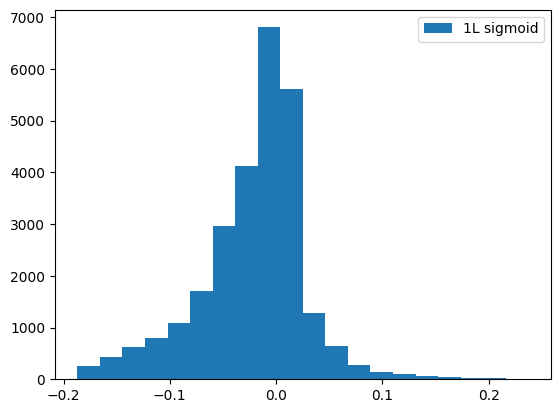

In [9]:
#p_array = pd.DataFrame(p_array)
p_mod = (np.array(p_array).T)[0]
smallest = min(p_mod)
rounded_p_mod = [round(element, 2) for element in p_mod]
print(p_mod)
print(rounded_p_mod)
print(smallest)


filtered_p_mod = p_mod[~np.isinf(p_mod)]

#plt.hist(p_array.dropna().values, bins = 10, color = 'red')#color = "#0504aa")#, edgecolor = 'darkred')
plt.hist(filtered_p_mod, bins = 20)#, color = 'red')#color = "#0504aa")#, edgecolor = 'darkred')
plt.legend(["1L sigmoid"])
#plt.xlim(-4,0)

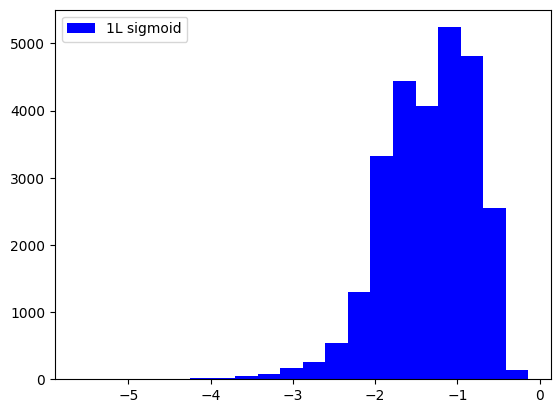

In [10]:
ratio_array = np.array(ratio_array)
filtered_ratio_array = ratio_array[~np.isinf(p_mod)]
plt.hist(filtered_ratio_array, bins = 20, color = 'blue')#color = "#0504aa")#, edgecolor = 'darkred')
plt.legend(["1L sigmoid"])
#plt.xlim(-6,-2)

IndexError: list index out of range

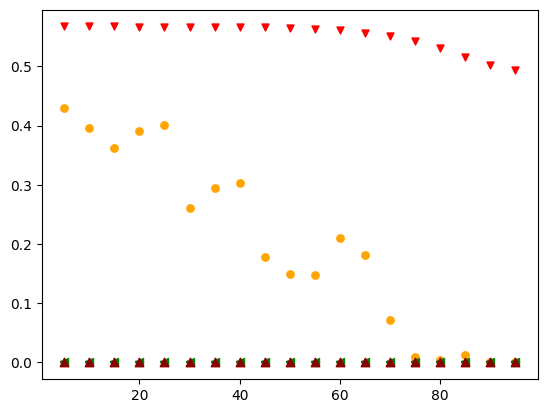

In [11]:

poly_model.eval() #changes the data to a convientv form. parses the expression argument and evaluates it as a python expression. 
with torch.no_grad():
    sum = 0
    goat = 0
    djd = ['v', 'o', '*', '<', '^']
    colors = ['red', 'orange', 'black', 'green', 'darkred']
    size = [25, 28, 30, 33, 37]
    for i in range(0,len(iteration_array)):
        sum = sum + 1
        if (i + 1) % 20 == 0: #10000
            goat = goat + 1
            plt.scatter(iteration_array[0: 19], loss_array[sum-20:i], label = f'n_repeat {goat}', color = colors[goat-1], marker = djd[goat-1], linestyle = '-', s= size[goat-1])   #, color = "red")
        
    plt.legend(loc='best')

    #plt.ylim(-0.05,0.2)


In [ ]:
poly_model.eval() #changes the data to a convientv form. parses the expression argument and evaluates it as a python expression. 
with torch.no_grad():
    plt.plot(iteration_array, loss_array)

In [ ]:
#make the activation fucntion grah nicer

print(len(ai_1_mean_array))
ai_1_mean_compacked = []
ai_2_mean_compacked = []
ai_3_mean_compacked = []
ai_4_mean_compacked = []
ai_1_std_compacked_plus = []
ai_2_std_compacked_plus = []
ai_3_std_compacked_plus = []
ai_4_std_compacked_plus = []
ai_1_std_compacked_minus = []
ai_2_std_compacked_minus = []
ai_3_std_compacked_minus = []
ai_4_std_compacked_minus = []

ai_1_std_compacked_plus2 = []
ai_2_std_compacked_plus2 = []
ai_3_std_compacked_plus2 = []
ai_4_std_compacked_plus2 = []
ai_1_std_compacked_minus2 = []
ai_2_std_compacked_minus2 = []
ai_3_std_compacked_minus2 = []
ai_4_std_compacked_minus2 = []


 



iteration_array_for_sigmoid_compacked = []
factor = 10

for i in range(0,len(ai_1_mean_array)):
    if (i + 1) % 4 == 0: 
        ai_1_mean_compacked.append(ai_1_mean_array[i])
        ai_2_mean_compacked.append(ai_2_mean_array[i])
        ai_3_mean_compacked.append(ai_3_mean_array[i])
        ai_4_mean_compacked.append(ai_4_mean_array[i])

        ai_1_std_compacked_plus.append(ai_1_std_array[i]/factor +ai_1_mean_array[i])
        ai_1_std_compacked_minus.append(ai_1_mean_array[i]-ai_1_std_array[i]/factor )
        ai_2_std_compacked_plus.append(ai_2_std_array[i]/factor +ai_2_mean_array[i])
        ai_2_std_compacked_minus.append(ai_2_mean_array[i]-ai_2_std_array[i]/factor )
        ai_3_std_compacked_plus.append(ai_3_std_array[i]/factor +ai_3_mean_array[i])
        ai_3_std_compacked_minus.append(ai_3_mean_array[i]-ai_3_std_array[i]/factor )
        ai_4_std_compacked_plus.append(ai_4_std_array[i]/factor +ai_4_mean_array[i])
        ai_4_std_compacked_minus.append(ai_4_mean_array[i]-ai_4_std_array[i]/factor )

        ai_1_std_compacked_plus2.append(2*ai_1_std_array[i]/factor +ai_1_mean_array[i])
        ai_1_std_compacked_minus2.append(ai_1_mean_array[i]-2*ai_1_std_array[i]/factor )
        ai_2_std_compacked_plus2.append(2*ai_2_std_array[i]/factor +ai_2_mean_array[i])
        ai_2_std_compacked_minus2.append(ai_2_mean_array[i]-2*ai_2_std_array[i]/factor )
        ai_3_std_compacked_plus2.append(2*ai_3_std_array[i]/factor +ai_3_mean_array[i])
        ai_3_std_compacked_minus2.append(ai_3_mean_array[i]-2*ai_3_std_array[i]/factor )
        ai_4_std_compacked_plus2.append(2*ai_4_std_array[i]/factor +ai_4_mean_array[i])
        ai_4_std_compacked_minus2.append(ai_4_mean_array[i]-2*ai_4_std_array[i]/factor )
    



        #ai_2_std_compacked.append(ai_2_std_array[i]/10)
        #ai_3_std_compacked.append(ai_3_std_array[i]/10)
        #ai_4_std_compacked.append(ai_4_std_array[i]/10)
    
        iteration_array_for_sigmoid_compacked.append(iteration_array_for_sigmoid[i])


error_marker_style = 's'
marker_style = 'o'
capsize = 5
#plt.scatter(iteration_array_for_sigmoid_compacked, ai_1_mean_compacked, marker = marker_style)
#plt.errorbar(iteration_array_for_sigmoid_compacked, ai_1_mean_compacked, yerr= ai_1_std_compacked, fmt = error_marker_style, capsize = capsize, linestyle = 'solid')
#plt.errorbar(iteration_array_for_sigmoid_compacked, ai_2_mean_compacked, yerr= ai_2_std_compacked, fmt = error_marker_style, capsize = capsize, linestyle = 'solid')
#plt.errorbar(iteration_array_for_sigmoid_compacked, ai_3_mean_compacked, yerr= ai_3_std_compacked, fmt = error_marker_style, capsize = capsize, linestyle = 'solid')
#plt.errorbar(iteration_array_for_sigmoid_compacked, ai_4_mean_compacked, yerr= ai_4_std_compacked, fmt = error_marker_style, capsize = capsize, linestyle = 'solid')

plt.plot(iteration_array_for_sigmoid_compacked, ai_1_mean_compacked, color = 'red')
plt.scatter(iteration_array_for_sigmoid_compacked, ai_1_std_compacked_plus, label = '1', s = 20,marker= 'v', linestyle = 'solid', color = 'red', facecolor = 'none')
plt.scatter(iteration_array_for_sigmoid_compacked, ai_1_std_compacked_minus, s = 20,marker= 'v', linestyle = 'solid', color = 'red', facecolor = 'none')
#plt.scatter(iteration_array_for_sigmoid_compacked, ai_1_std_compacked_plus2, s = 20,marker= 'v', linestyle = 'solid', color = 'red', facecolor = 'none')
#plt.scatter(iteration_array_for_sigmoid_compacked, ai_1_std_compacked_minus2, s = 20,marker= 'v', linestyle = 'solid', color = 'red', facecolor = 'none')

plt.plot(iteration_array_for_sigmoid_compacked, ai_2_mean_compacked, color = 'green')
plt.scatter(iteration_array_for_sigmoid_compacked, ai_2_std_compacked_plus, label = '2', s = 20,marker= 's', linestyle = 'solid', color = 'green', facecolor = 'none')
plt.scatter(iteration_array_for_sigmoid_compacked, ai_2_std_compacked_minus, s = 20,marker= 's', linestyle = 'solid', color = 'green', facecolor = 'none')
#plt.scatter(iteration_array_for_sigmoid_compacked, ai_2_std_compacked_plus2,  s = 20,marker= 's', linestyle = 'solid', color = 'green', facecolor = 'none')
#plt.scatter(iteration_array_for_sigmoid_compacked, ai_2_std_compacked_minus2, s = 20,marker= 's', linestyle = 'solid', color = 'green', facecolor = 'none')

plt.plot(iteration_array_for_sigmoid_compacked, ai_3_mean_compacked, color = 'blue')
plt.scatter(iteration_array_for_sigmoid_compacked, ai_3_std_compacked_plus, label = '3', s = 20,marker= '^', linestyle = 'solid', color = 'blue', facecolor = 'none')
plt.scatter(iteration_array_for_sigmoid_compacked, ai_3_std_compacked_minus, s = 20,marker= '^', linestyle = 'solid', color = 'blue', facecolor = 'none')
#plt.scatter(iteration_array_for_sigmoid_compacked, ai_3_std_compacked_plus2, s = 20,marker= '^', linestyle = 'solid', color = 'blue', facecolor = 'none')
#plt.scatter(iteration_array_for_sigmoid_compacked, ai_3_std_compacked_minus2, s = 20,marker= '^', linestyle = 'solid', color = 'blue', facecolor = 'none')

plt.plot(iteration_array_for_sigmoid_compacked, ai_4_mean_compacked, color = 'black')
plt.scatter(iteration_array_for_sigmoid_compacked, ai_4_std_compacked_plus, label = '4', s = 20,marker= 'o', linestyle = 'solid', color = 'black', facecolor = 'none')
plt.scatter(iteration_array_for_sigmoid_compacked, ai_4_std_compacked_minus, s = 20,marker= 'o', linestyle = 'solid', color = 'black', facecolor = 'none')
#plt.scatter(iteration_array_for_sigmoid_compacked, ai_4_std_compacked_plus2,  s = 20,marker= 'o', linestyle = 'solid', color = 'black', facecolor = 'none')
#plt.scatter(iteration_array_for_sigmoid_compacked, ai_4_std_compacked_minus2, s = 20,marker= 'o', linestyle = 'solid', color = 'black', facecolor = 'none')

#plt.scatter( iteration_array_for_sigmoid_compacked, ai_2_mean_compacked, label = '2', linestyle = 'solid')
#plt.scatter( iteration_array_for_sigmoid_compacked, ai_3_mean_compacked, label = '3', linestyle = 'solid')
#plt.scatter( iteration_array_for_sigmoid_compacked, ai_4_mean_compacked, label = '4', linestyle = 'solid')

plt.legend()
plt.show

In [ ]:
plt.plot(iteration_array, dai_1_mean_dx1_array, 'red')
plt.plot(iteration_array, dai_2_mean_dx1_array, 'blue')
plt.plot(iteration_array, dai_3_mean_dx1_array, 'green')
plt.plot(iteration_array, dai_4_mean_dx1_array, 'black')

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

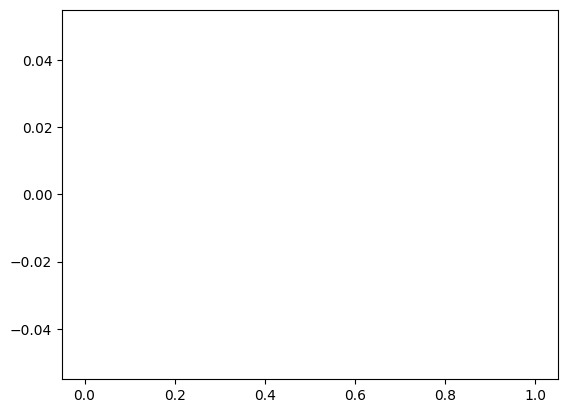

In [12]:
bins_dai_1_dx1 = 10
plt.hist(dai_1_mean_dx1_array, bins= bins_dai_1_dx1)
plt.hist(dai_2_mean_dx1_array, bins= bins_dai_1_dx1)
plt.hist(dai_3_mean_dx1_array, bins= bins_dai_1_dx1)
plt.hist(dai_4_mean_dx1_array, bins= bins_dai_1_dx1)
